In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
data= pd.read_csv('letter-recognition.data')

In [ ]:
data

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19995,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19996,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19997,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T       19999 non-null  object
 1   2       19999 non-null  int64 
 2   8       19999 non-null  int64 
 3   3       19999 non-null  int64 
 4   5       19999 non-null  int64 
 5   1       19999 non-null  int64 
 6   8.1     19999 non-null  int64 
 7   13      19999 non-null  int64 
 8   0       19999 non-null  int64 
 9   6       19999 non-null  int64 
 10  6.1     19999 non-null  int64 
 11  10      19999 non-null  int64 
 12  8.2     19999 non-null  int64 
 13  0.1     19999 non-null  int64 
 14  8.3     19999 non-null  int64 
 15  0.2     19999 non-null  int64 
 16  8.4     19999 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [ ]:
columns=['letters','x1','y1','x2','y2','x3','y3','x4','y4','x5','y5','x6','y6','x7','y7','x8','y8']

In [ ]:
data = pd.read_csv('letter-recognition.data',names=columns,header=None)

In [ ]:
data

,letters,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [ ]:
#Preprocessing
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
encoder=LabelEncoder()

In [ ]:
x=data.drop('letters',axis=1)
y=data['letters']

In [ ]:
y_encoded=encoder.fit_transform(y)

In [ ]:
y_catego=to_categorical(y_encoded)

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y_catego,test_size=0.2,random_state=42)

In [ ]:
scaler=StandardScaler()

In [ ]:
x_train_scale= scaler.fit_transform(x_train)
x_test_scale=scaler.fit_transform(x_test)

In [ ]:
#Model Build

In [ ]:
model = Sequential([Input(shape=(x_train_scale.shape[1],)),
                    Dense(128,activation='relu'),
                    Dense(64,activation='relu'),
                    Dense(32,activation='relu'),
                    Dense(26,activation='softmax')])

In [ ]:
model.compile('adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 26)             │           858 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,370 (52.23 KB)

 Trainable params: 13,370 (52.23 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history= model.fit(x_train_scale,y_train,epochs=50,validation_split=0.2,verbose=1)

Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3608 - loss: 2.3000 - val_accuracy: 0.7281 - val_loss: 0.9339
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7689 - loss: 0.7871 - val_accuracy: 0.8163 - val_loss: 0.6374
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8314 - loss: 0.5668 - val_accuracy: 0.8478 - val_loss: 0.5102
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8658 - loss: 0.4502 - val_accuracy: 0.8709 - val_loss: 0.4343
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8896 - loss: 0.3695 - val_accuracy: 0.8959 - val_loss: 0.3616
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9034 - loss: 0.3186 - val_accuracy: 0.8966 - val_loss: 0.3318
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9092 - loss: 0.2940 - val_accuracy: 0.9019 - val_loss: 0.3122
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9219 - loss: 0.2496 - val_accuracy: 0.

In [ ]:
y_pred=model.predict(x_test_scale)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
pred_indices= np.argmax(y_pred,axis=1)
actual_indices=np.argmax(y_test,axis=1)

In [ ]:
pred_label=encoder.inverse_transform(pred_indices)
actual_label=encoder.inverse_transform(actual_indices)

In [ ]:
print("Prediction Vs Accuracy")
for i in range(5):
    print(f"Actual: {actual_label[i]}, Predicted: {pred_label[i]}")


Prediction Vs Accuracy
Actual: T, Predicted: X
Actual: L, Predicted: L
Actual: A, Predicted: A
Actual: E, Predicted: E
Actual: Q, Predicted: Q


In [ ]:
loss,accuracy= model.evaluate(x_test_scale,y_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9519 - loss: 0.2115


In [ ]:
loss

0.20011337101459503

In [ ]:
accuracy

0.953000009059906

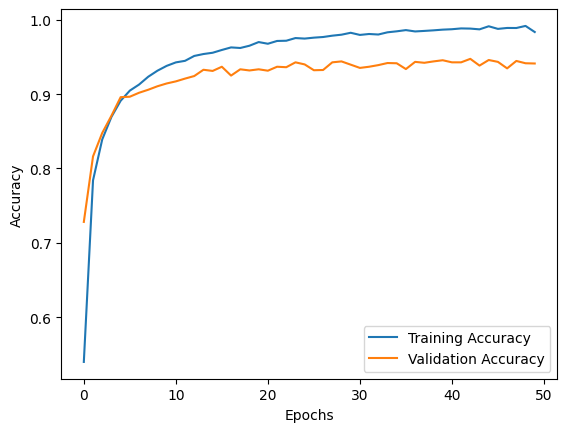

In [ ]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show();